In [2]:
本节重点
Pandas高级处理
    缺失值处理
    数据离散化
    合并
    交叉表与透视表
    分组与聚合
    综合案例

4.6 高级处理-缺失值处理
    1）如何进行缺失值处理
        两种思路：
            1）删除含有缺失值的样本
            2）替换/插补
        4.6.1 如何处理nan
            1）判断数据中是否存在NaN
                pd.isnull(df)
                pd.notnull(df)
            2）删除含有缺失值的样本
                df.dropna(inplace=False)
               替换/插补
                df.fillna(value, inplace=False)
         4.6.2 不是缺失值nan，有默认标记的
            1）替换 ？-> np.nan
                df.replace(to_replace="?", value=np.nan)
            2）处理np.nan缺失值的步骤
    2）缺失值处理实例
4.7 高级处理-数据离散化
        性别 年龄
    A    1   23
    B    2   30
    C    1   18
        物种 毛发
    A    1
    B    2
    C    3
        男 女 年龄
    A   1  0  23
    B   0  1  30
    C   1  0  18

        狗  猪  老鼠 毛发
    A   1   0   0   2
    B   0   1   0   1
    C   0   0   1   1
    one-hot编码&哑变量
4.7.1 什么是数据的离散化
    原始的身高数据：165，174，160，180，159，163，192，184
4.7.2 为什么要离散化
4.7.3 如何实现数据的离散化
    1）分组
        自动分组sr=pd.qcut(data, bins)
        自定义分组sr=pd.cut(data, [])
    2）将分组好的结果转换成one-hot编码
        pd.get_dummies(sr, prefix=)
4.8 高级处理-合并
    numpy
        np.concatnate((a, b), axis=)
        水平拼接
            np.hstack()
        竖直拼接
            np.vstack()
    1）按方向拼接
        pd.concat([data1, data2], axis=1)
    2）按索引拼接
        pd.merge实现合并
        pd.merge(left, right, how="inner", on=[索引])
4.9 高级处理-交叉表与透视表
    找到、探索两个变量之间的关系
    4.9.1 交叉表与透视表什么作用
    4.9.2 使用crosstab(交叉表)实现
        pd.crosstab(value1, value2)
    4.9.3 pivot_table
4.10 高级处理-分组与聚合
    4.10.1 什么是分组与聚合
    4.10.2 分组与聚合API
        dataframe
        sr

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 21)

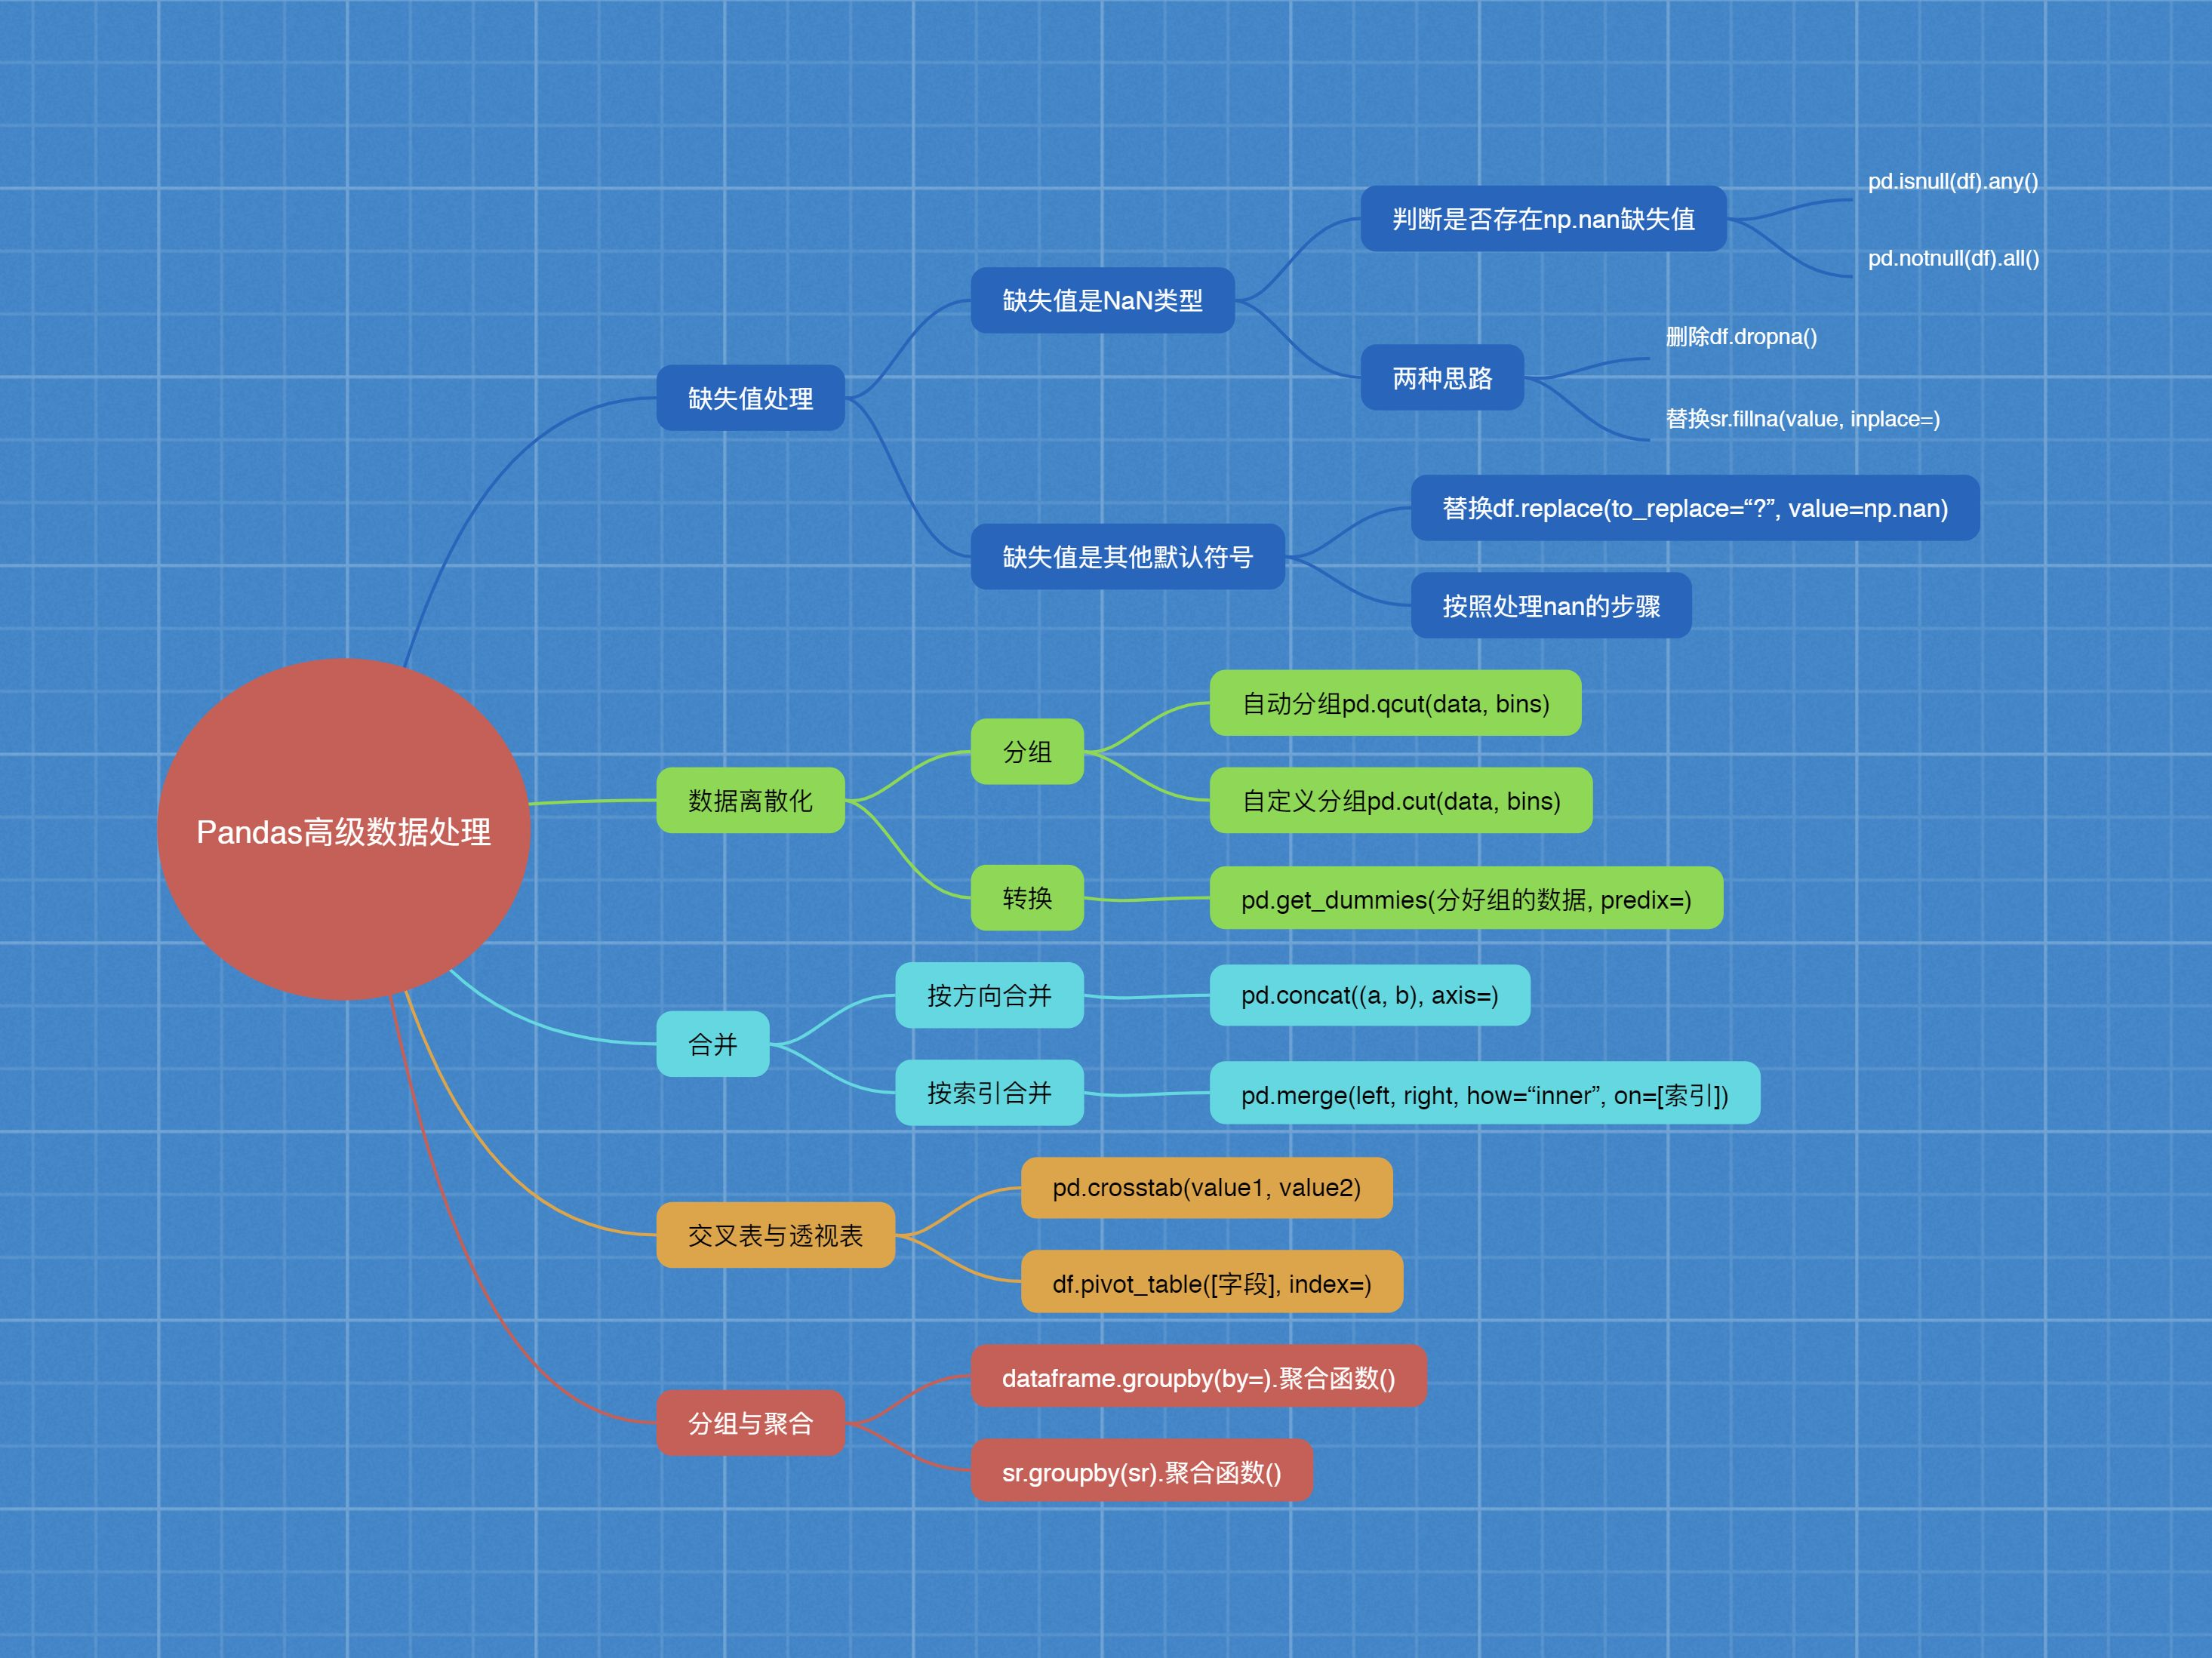

# Pandas 高级处理

## 缺失值处理

In [1]:
import pandas as pd
import numpy as np

In [2]:
movie = pd.read_csv("../../resource/data-mining/IMDB-Movie-Data.csv")
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### 判断是否存在缺失值

In [3]:
# 1)判断是否存在缺失值  np.all有一个False就返回False  np.any 有一个True返回 True
np.any(movie.isnull())  # 返回True说明数据中 存在缺失值

True

In [4]:
np.all(movie.notnull())  # 返回False说明数据中 存在缺失

False

In [6]:
pd.isnull(movie).any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [130]:
pd.notnull(movie).all()

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool

### 缺失值处理

In [131]:
# 方法1：删除含有缺失值的样本

In [132]:
new_movie = movie.dropna()  # 加上inplace=True 则修改原始数据

In [133]:
pd.notnull(movie).all()

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool

In [134]:
pd.notnull(new_movie).all()

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

In [135]:
# 含有缺失值的字段
# moRevenue (Millions)    False
# Metascore             False

In [141]:
movie["Revenue (Millions)"].fillna(
    movie["Revenue (Millions)"].mean(), inplace=True)
movie["Metascore"].fillna(movie["Metascore"].mean(), inplace=True)

In [142]:
pd.notnull(movie).all()  # 缺失值已经处理完毕不存在缺失值了

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

### 不是缺失值的，有默认标记的

In [173]:
cancer = pd.read_csv("../../resource/cancer/breast-cancer-wisconsin.data", names=["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion",
                                                                                  "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])
cancer

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [174]:
# 1.替换
cancer.replace("?", np.nan, inplace=True)  # 将？号替换成Nan

In [175]:
np.all(cancer != "?")

True

In [176]:
pd.notnull(cancer).all()

Sample code number              True
Clump Thickness                 True
Uniformity of Cell Size         True
Uniformity of Cell Shape        True
Marginal Adhesion               True
Single Epithelial Cell Size     True
Bare Nuclei                    False
Bland Chromatin                 True
Normal Nucleoli                 True
Mitoses                         True
Class                           True
dtype: bool

In [178]:
# 2.删除缺失值
cancer.dropna(inplace=True)

In [179]:
pd.notnull(cancer).all()

Sample code number             True
Clump Thickness                True
Uniformity of Cell Size        True
Uniformity of Cell Shape       True
Marginal Adhesion              True
Single Epithelial Cell Size    True
Bare Nuclei                    True
Bland Chromatin                True
Normal Nucleoli                True
Mitoses                        True
Class                          True
dtype: bool

## 数据离散化

### 如何进行数据离散化

In [201]:
# 1.获取数据
data = pd.Series({"Nol:165": 165, "No2:174": 174, "No3:160": 160, "No4:180": 180,
                 "No5:159": 159, "No6:163": 163, "No7:192": 192, "No8:184": 184})
data

Nol:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
No6:163    163
No7:192    192
No8:184    184
dtype: int64

In [204]:
# 2.分组
# 自行分组  pd.qcut(data, q) 对数据进行分组将数据分组，一般会与value_counts搭配使用，统计每组的个数
sr = pd.qcut(data, 3)

In [207]:
sr.value_counts()

(158.999, 163.667]    3
(178.0, 192.0]        3
(163.667, 178.0]      2
dtype: int64

In [205]:
sr

Nol:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]

In [206]:
# 3.转换成one-hot编码
pd.get_dummies(sr, prefix="height")

,"height_(158.999, 163.667]","height_(163.667, 178.0]","height_(178.0, 192.0]"
Nol:165,0,1,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,0,1
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


In [215]:
# 自定义分组
bins = [150, 160, 170, 180, 190, 195]
sr2 = pd.cut(data, bins)

In [216]:
sr2

Nol:165    (160, 170]
No2:174    (170, 180]
No3:160    (150, 160]
No4:180    (170, 180]
No5:159    (150, 160]
No6:163    (160, 170]
No7:192    (190, 195]
No8:184    (180, 190]
dtype: category
Categories (5, interval[int64]): [(150, 160] < (160, 170] < (170, 180] < (180, 190] < (190, 195]]

In [217]:
sr2.value_counts()

(150, 160]    2
(160, 170]    2
(170, 180]    2
(180, 190]    1
(190, 195]    1
dtype: int64

In [219]:
# get_dummies
pd.get_dummies(sr2, "身高")

,"身高_(150, 160]","身高_(160, 170]","身高_(170, 180]","身高_(180, 190]","身高_(190, 195]"
Nol:165,0,1,0,0,0
No2:174,0,0,1,0,0
No3:160,1,0,0,0,0
No4:180,0,0,1,0,0
No5:159,1,0,0,0,0
No6:163,0,1,0,0,0
No7:192,0,0,0,0,1
No8:184,0,0,0,1,0


### 案例：股票涨跌幅数据进行离散化处理

In [220]:
# 我们对股票每日的"p_change"进行离散化
# 1.获取数据
stock = pd.read_csv("../../resource/data-mining/stock_day.csv")

In [222]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [237]:
p_change = stock["p_change"]
p_change.min()

-10.03

In [232]:
# 2.分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
sr = pd.cut(p_change, bins)

In [233]:
sr.head()

2018-02-27    (0, 3]
2018-02-26    (3, 5]
2018-02-23    (0, 3]
2018-02-22    (0, 3]
2018-02-14    (0, 3]
Name: p_change, dtype: category
Categories (8, interval[int64]): [(-100, -7] < (-7, -5] < (-5, -3] < (-3, 0] < (0, 3] < (3, 5] < (5, 7] < (7, 100]]

In [240]:
sr.value_counts().sort_index()

(-100, -7]     34
(-7, -5]       28
(-5, -3]       51
(-3, 0]       188
(0, 3]        215
(3, 5]         57
(5, 7]         35
(7, 100]       35
Name: p_change, dtype: int64

In [242]:
# 3.转变成one_hot编码
stock_change = pd.get_dummies(sr, "rise")
stock_change.head()

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


## 合并

### pd.concat实现数据合并

In [241]:
# 处理好的one-hot编码与原数据进行合并
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [244]:
stock_change.head()

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


In [246]:
pd.concat([stock, stock_change], axis=1).head()  # 水平拼接

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,0,0,0,0,1,0,0,0


In [249]:
pd.concat([stock, stock_change], axis=0)  # 如果两个表的字段不一致，就会多加出来另一张表的一列数据

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### pd.merge按索引进行拼接

In [284]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K1', 'K2'],
                      'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [285]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [286]:
right

,key,key1,key2,C,D
0,K0,K0,K0,C0,D0
1,K1,K1,K0,C1,D1
2,K1,K1,K0,C2,D2
3,K2,K2,K0,C3,D3


In [271]:
pd.merge(left, right, how="inner", on=["key1", "key2"])  # 内连接  两边都有的

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [257]:
# 左连接 把左表中无匹配项的，内连接有的保留下来
pd.merge(left, right, how="left", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [258]:
pd.merge(left, right, how="right", on=["key1", "key2"])  # 右连接  与左连接相似

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [259]:
pd.merge(left, right, how="outer", on=["key1", "key2"])  # 外连接  左右两边有的键都保留进来

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [287]:
pd.merge(left, right, how="inner", left_on="key1", right_on="key")

,key1_x,key2_x,A,B,key,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,K0,C0,D0
1,K0,K1,A1,B1,K0,K0,K0,C0,D0
2,K1,K0,A2,B2,K1,K1,K0,C1,D1
3,K1,K0,A2,B2,K1,K1,K0,C2,D2
4,K2,K1,A3,B3,K2,K2,K0,C3,D3


## 交叉表与透视表

In [288]:
# 探究股票的涨跌与星期几有关？
# 准备星期数据列
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [289]:
date = pd.to_datetime(stock.index)

In [291]:
date

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)

In [303]:
date.weekday

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)

In [302]:
stock["week"] = date.weekday

In [304]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


In [307]:
# 处理哪个数据是涨跌幅的  涨的是1 跌的是0
stock["pona"] = np.where(stock["p_change"] > 0, 1, 0)

In [313]:
# 交叉表
crosstab_data = pd.crosstab(stock["week"], stock["pona"])
crosstab_data

pona,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [325]:
# 算出每一行数据的占比
line_sum = crosstab_data.sum(axis=1)

In [327]:
relation = crosstab_data.div(line_sum, axis=0)
relation

pona,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


<AxesSubplot:xlabel='week'>

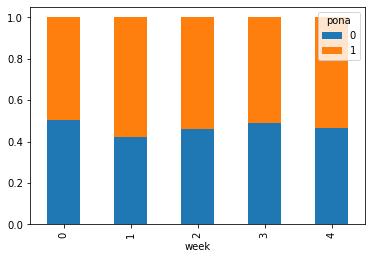

In [331]:
relation.plot(kind="bar",stacked=True)

In [338]:
# 透视表
stock.pivot_table(["pona"],index=["week"])

,pona
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


## 分组与聚合

In [351]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [348]:
# 进行分组，对颜色分组 price1聚合

# 1. 用dataframe的方法进行分组与聚合
col.groupby(by="color")["price1"].max()
col.groupby()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

In [361]:
# 用Series的方法进行分组与聚合
col["price1"].groupby(col["color"]).max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

### 星巴克零售店铺数据

In [8]:
import pandas as pd
import numpy as np
# 现在我们有一组关于全球星巴克店铺的统计数据，如果我想知道美国的星巴克数量和中国的哪个多，
# 或者我想知道中国每个省份星巴克的数量的情况，那么应该怎么办？
# 1.准备数据
starbucks = pd.read_csv("../../resource/data-mining/directory.csv")
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


<AxesSubplot:xlabel='Country'>

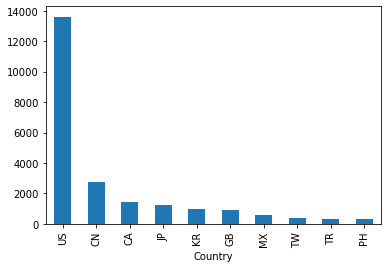

In [9]:
# 按照国家分组，求出每个国家的星巴克零售店数量
starbucks.groupby(by="Country").count()["Brand"].sort_values(ascending=False)[:10].plot(kind="bar")

In [390]:
starbucks.groupby(by=["Country","Brand"]).count()["Store Number"]

Country  Brand          
AD       Starbucks              1
AE       Starbucks            144
AR       Starbucks            108
AT       Starbucks             18
AU       Starbucks             22
                            ...  
US       Evolution Fresh        2
         Starbucks          13311
         Teavana              294
VN       Starbucks             25
ZA       Starbucks              3
Name: Store Number, Length: 78, dtype: int64

## 综合案例

In [4]:
movie = pd.read_csv("../../resource/data-mining/IMDB-Movie-Data.csv")
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


**我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？**


In [6]:
# 得出评分的平均分
movie["Rating"].mean()

6.723200000000003

In [10]:
# 导演的人数等信息
np.unique(movie["Director"]).size

644

In [11]:
pd.unique(movie["Director"]).shape[0]

644

**对于这一组电影数据，如果我们想Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？**

In [12]:
movie["Rating"].values.shape

(1000,)

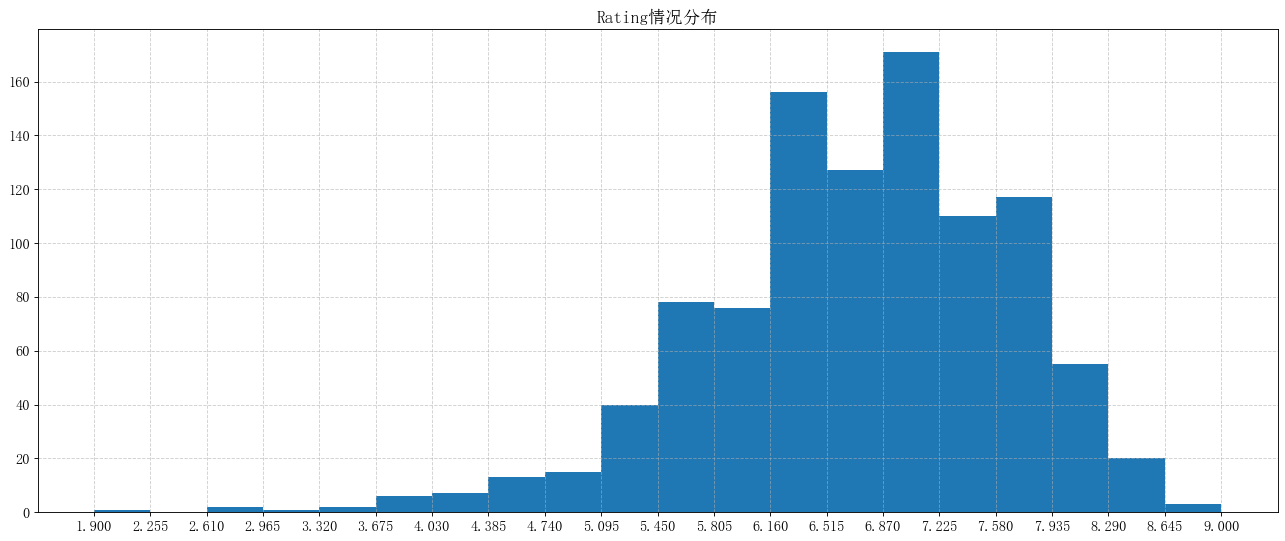

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='simsun', size=13)
# 1..创建画布
plt.figure(figsize=(20, 8), dpi=80)
# 2..绘制图像 第一个参数横坐标 第二个参数纵坐标
plt.hist(movie["Rating"].values,20)
# 设置横坐标
plt.xticks(np.linspace(movie["Rating"].values.min(),movie["Rating"].values.max(),21))
# 设置网格
plt.grid(linestyle="--", alpha=0.6)
# 设置标题
plt.title("Rating情况分布")
# 3.将画呈现出来
plt.show()

In [14]:
moive["Runtime (Minutes)"].values.max()

NameError: name 'moive' is not defined

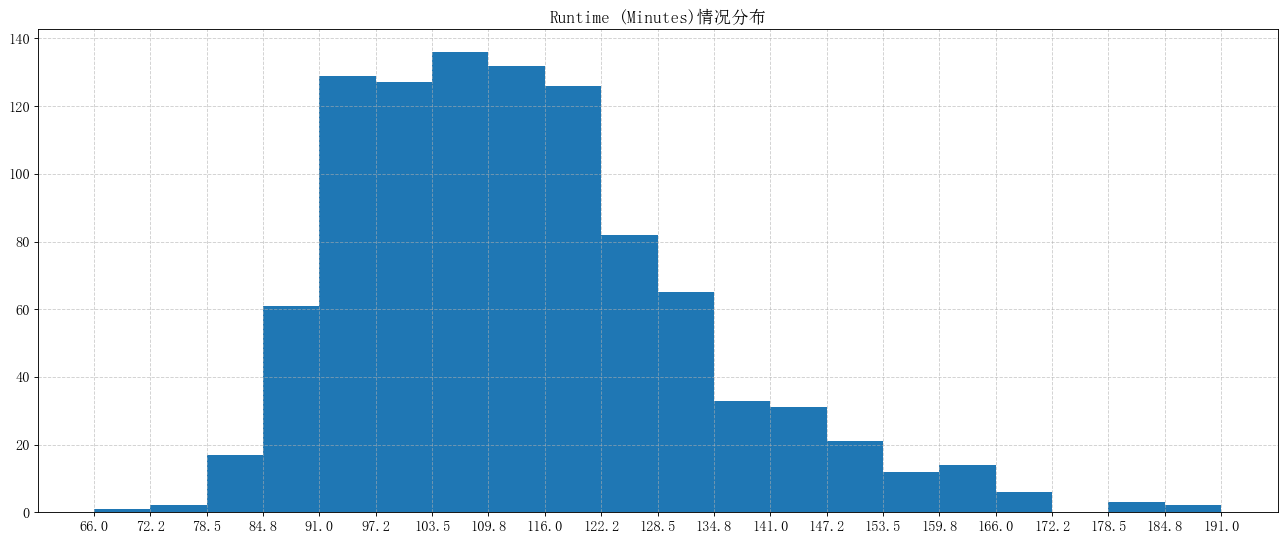

In [18]:
max_ = movie["Runtime (Minutes)"].values.max()
min_ = movie["Runtime (Minutes)"].values.min()
import matplotlib.pyplot as plt
plt.rc('font', family='simsun', size=13)
# 1..创建画布
plt.figure(figsize=(20, 8), dpi=80)
# 2..绘制图像 第一个参数横坐标 第二个参数纵坐标
plt.hist(movie["Runtime (Minutes)"].values,20)
# 设置横坐标
plt.xticks(np.linspace(min_,max_,21))
# 设置网格
plt.grid(linestyle="--", alpha=0.6)
# 设置标题
plt.title("Runtime (Minutes)情况分布")
# 3.将画呈现出来
plt.show()

**对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？**

In [20]:
'''
1、创建一个全为0的dataframe，列索引置为电影的分类，temp_df
2、遍历每一部电影，temp_df中把分类出现的列的值置为1
3、求和
'''
# 进行字符串分割
temp_list = [i.split(",") for i in movie["Genre"]]

In [21]:
temp_list[:][:10]

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance']]

In [22]:
# 求出有什么类别的电影
genre_list = np.unique([i  for j in temp_list for i in j])     
genre_list

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [23]:
count = pd.DataFrame(np.zeros(shape=(len(genre_list),1),dtype=np.int32),index=genre_list,columns=["num"])
count

,num
Action,0
Adventure,0
Animation,0
Biography,0
Comedy,0
Crime,0
Drama,0
Family,0
Fantasy,0
History,0


In [559]:
count.loc["History"]["num"]

0

In [24]:
totle = [i  for j in temp_list for i in j]
totle

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [560]:
for j in temp_list:
    for i in j:
        count.loc[i]["num"]+=1

In [561]:
count

,num
Action,303
Adventure,259
Animation,49
Biography,81
Comedy,279
Crime,150
Drama,513
Family,51
Fantasy,101
History,29


In [563]:
count.sort_values(by="num",ascending=False)

,num
Drama,513
Action,303
Comedy,279
Adventure,259
Thriller,195
Crime,150
Romance,141
Sci-Fi,120
Horror,119
Mystery,106
